# Regresión lineal simple

En una regresión lineal asumimos que $y$ es una función lineal de $x$:
$$
y = \beta \cdot x + \alpha + \epsilon
$$

Una vez calculados los valores $\beta$ y $\alpha$ podremos *estimar* $y$ introduciendo $x$. Como sabemos, $\beta$ es el coeficiente de correlación, mientras que $\alpha$ es la intercepción con el origen.

En el caso de $\epsilon$ será una variable aleatoria con distribución normal, el cual expresará el error o residuo. Si el residuo no se expresa como una distribución normal, es que el modelo no es lineal, y por tanto el punto de partida es erróneo.

## Modelo con datos simulados

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

# specified libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# seaborn style
sns.set()

# seed
np.random.seed(9876789)

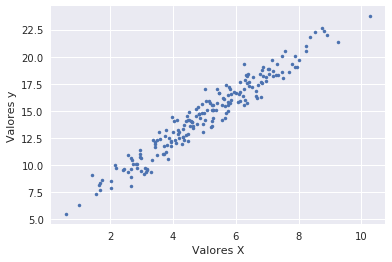

In [2]:
# datos sintéticos
X = 5 + 1.8 * np.random.randn(200)
res = 0.9 * np.random.randn(200)
y_obs = 5 + 1.9 * X + res

# visualizamos
plt.plot(X,y_obs, marker='.', linestyle='none')
plt.xlabel("Valores X")
plt.ylabel("Valores y")
plt.show()

In [3]:
# Reshape the data
X = np.reshape(a=X, newshape=(-1, 1))
y_obs = np.reshape(a=y_obs, newshape=(-1, 1))

# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X, y_obs)
print("R2: ", regressor.score(X, y_obs))

R2:  0.9415288345876828


In [4]:
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X, y_obs)

# Predicting the Test set results
y_pred = regressor.predict(X)

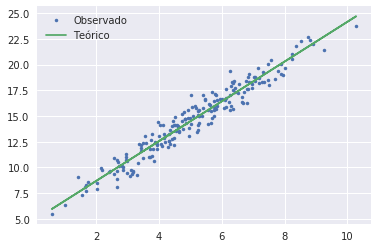

In [5]:
# Visualising the Training set results
plt.plot(X, y_obs, marker='.', linestyle='none', label='Observado')
plt.plot(X, regressor.predict(X), label='Teórico')
plt.legend()
plt.show()

In [6]:
# cálculo de los distintos errores

# SSR
ssr = (y_pred - np.mean(y_obs)) ** 2
# SSD
ssd = (y_pred - y_obs)
# SST
sst = (y_obs - np.mean(y_obs)) ** 2 

# coeficiente r2
ssr.sum() / sst.sum()

0.9415288345876835

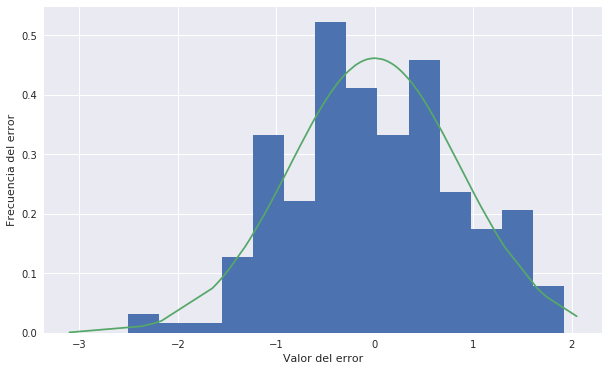

In [7]:
# ssd normal teórico
mean = np.mean(ssd)
std = np.std(ssd)

# distribución de datos teóricos
ssd_th = np.sort(mean + std * np.random.randn(100))
freq_th = ss.norm.pdf(x=ssd_th, loc=mean, scale=std)

# Distribución de los errores que el modelo no es capaz de explicar

plt.figure(figsize=(10,6))
plt.hist(ssd, bins=int(np.sqrt(len(ssd))), density=True)
plt.plot(ssd_th, freq_th)
plt.xlabel("Valor del error")
plt.ylabel("Frecuencia del error")
plt.show()

## Modelo real

Vamos a utilizar el conjunto de datos de 'Fertilidad de la mujer' para realizar una regresión lineal

In [8]:
fertility = pd.read_csv('../data/female_literacy_fertility.csv')
fertility.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"


In [9]:
# Añadimos la columna de analfabetismo
fertility['illiteracy'] = 100 - fertility['female literacy']

In [10]:
# extracción de datos
y = fertility['fertility'].values
X = fertility['illiteracy'].values

In [11]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# shape
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((129,), (33,), (129,), (33,))

In [12]:
# Reshape
X_train = np.reshape(a=X_train, newshape=(-1,1))
y_train = np.reshape(a=y_train, newshape=(-1,1))
X_test = np.reshape(a=X_test, newshape=(-1,1))
y_test = np.reshape(a=y_test, newshape=(-1,1))

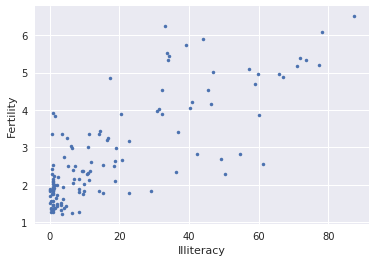

In [13]:
# visualizamos
plt.plot(X_train,y_train, marker='.', linestyle='none')
plt.xlabel("Illiteracy")
plt.ylabel("Fertility")
plt.show()

In [14]:
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

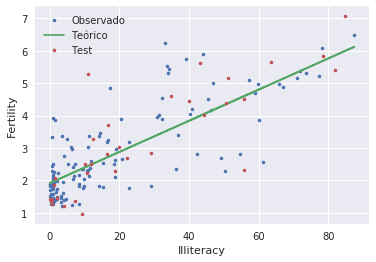

In [15]:
# Visualising the Training set results
plt.plot(X_train, y_train, marker='.', linestyle='none', label='Observado')
plt.plot(X_train, regressor.predict(X_train), label='Teórico')
plt.plot(X_test, y_test, marker='.', linestyle='none', label='Test')
plt.legend()
plt.xlabel("Illiteracy")
plt.ylabel("Fertility")
plt.show()

In [16]:
# Parámetros
r2 = regressor.score(X_train, y_train)

print("coeficiente de pearson: ", r2)

coeficiente de pearson:  0.6176893036432216


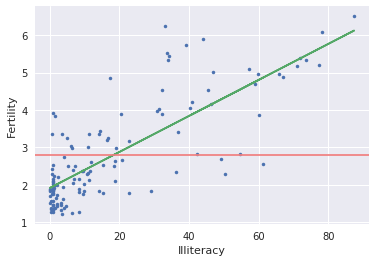

In [17]:
plt.plot(X_train, y_train, marker='.', linestyle='none')
plt.plot(X_train, regressor.predict(X_train))
plt.axhline(y=np.mean(y_train), color='lightcoral')
plt.xlabel("Illiteracy")
plt.ylabel("Fertility")
plt.show()

Vamos a calcular el coeficiente $r^2$ a mano, y posteriormente vamos a realizar una gráfica de los errores cometidos.

* SST = SSD + SSR
* SST (sum squared total): Variabilidad de los datos con respecto de su media
* SSD (sum squared differences) : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR (sum squared residuals): Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [18]:
# valores en color verde (teóricos)
y_pred = regressor.predict(X_train)

# cálculo de los distintos errores

# SSR
ssr = (y_pred - np.mean(y_train)) ** 2
# SSD
ssd = (y_pred - y_train) ** 2
# SST
sst = (y_train - np.mean(y_train)) ** 2 

# coeficiente r2
ssr.sum() / sst.sum()

0.6176893036432216

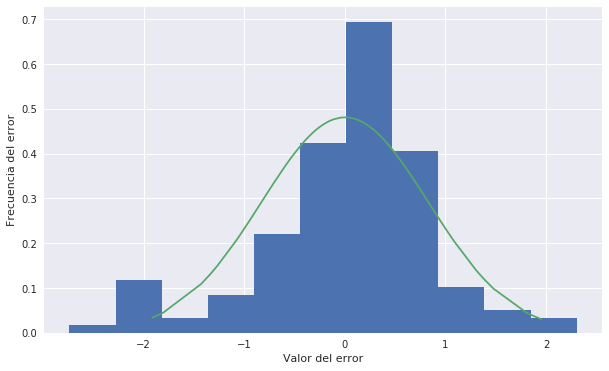

In [19]:
# ssd
ssd = (y_pred - y_train)

# ssd normal teórico
mean = np.mean(ssd)
std = np.std(ssd)

# distribución de datos teóricos
ssd_th = np.sort(mean + std * np.random.randn(100))
freq_th = ss.norm.pdf(x=ssd_th, loc=mean, scale=std)

# Distribución de los errores que el modelo no es capaz de explicar

plt.figure(figsize=(10,6))
plt.hist(ssd, bins=int(np.sqrt(len(ssd))), density=True)
plt.plot(ssd_th, freq_th)
plt.xlabel("Valor del error")
plt.ylabel("Frecuencia del error")
plt.show()

El resultado que obtenemos está alejado de los valores teóricos. Esto ya lo sabíamos debido a que el coeficiente $r^2$ nos ha salido $0.6$, por tanto no hay una correlación perfecta, sino que existen errores que desvían nuestro modelo.

## Interpretando los parámetros de la regresión

El modelo presenta una relación lineal. Pero vamos a comprobar la existencia de dicha relación planteando el contraste de hipótesis siguiente:

$$
\begin{equation}
    \begin{cases}
      H_{0} &  \beta = 0 \\
      H_{1} &  \beta \neq 0
    \end{cases}
  \end{equation}
$$

Si existe suficiente correlación, la covarianza sería positiva, y $\beta$ no sería cero ni estaría cerca de cero.

Podemos calcular un *t-estadístico* o un *p-valor*. Si el *p-valor* resultante es menor que el nivel de significación, rechazamos la hipótesis nula y aceptamos que existe una relación lineal entre x e y.

In [20]:
# variables
illiteracy = fertility['illiteracy'].values
fertility = fertility['fertility'].values

# calculamos el coeficiente de correlación
r_obs = np.corrcoef(illiteracy, fertility)[0][1]

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = np.corrcoef(illiteracy_permuted, fertility)[0][1]

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


### El error estándar residual

RSE es la desviación estándar del término del error. Desviación de la parte de datos que el modelo no es capaz de explicar por falta de información o más datos adicionales.

* En el caso de una regresión lineal simple:

$$
RSE = \sqrt{\frac{\Sigma (y_{i} - y(x_{i}))^2}{n - 2}} = \sqrt{\frac{SSD}{n - 2}}
$$

* En el caso de una regresión lineal múltiple:

$$
RSE = \sqrt{\frac{SSD}{n - k - 2}}
$$